In [2]:
import os
import pandas as pd

df_valid_raw = {}
df_test_raw = {}
MODEL_KEY = 'esm-33-gearnet-resiboost-v2'
FOLD_START = 3
FOLD_END = 4
for fold in range(FOLD_START, FOLD_END):
    files = [i for i in os.listdir(f'./result_cv/{MODEL_KEY}/fold_{fold}/intermediate/') if 'iter' in i]
    files.sort(key=lambda x: int(x.split('_')[1]))
    df_valid_raw[fold] = [pd.read_csv(f'./result_cv/{MODEL_KEY}/fold_{fold}/intermediate/' + file) for file in files if 'valid' in file]
    df_test_raw[fold] = [pd.read_csv(f'./result_cv/{MODEL_KEY}/fold_{fold}/intermediate/' + file) for file in files if 'test' in file]

In [3]:
from lib.utils import aggregate_pred_dataframe, generate_mean_ensemble_metrics_auto

def gen_prefix(n, fold=0):
    df = pd.DataFrame()
    for fold in range(FOLD_START, FOLD_END):
        df_valid = aggregate_pred_dataframe(dfs=df_valid_raw[fold][:n], apply_sig=True).copy()
        df_test = aggregate_pred_dataframe(dfs=df_test_raw[fold][:n], apply_sig=True).copy()
        me_result = generate_mean_ensemble_metrics_auto(df_valid=df_valid, df_test=df_test, start=0.1, end=0.9, step=0.01)
        df = pd.concat([df, pd.DataFrame.from_dict([{'fold': fold, **me_result}])], axis=0)
    print(f'prefix {n} done')
    return df.reset_index(drop=True)

prefix_stats = gen_prefix(30)

prefix 30 done


In [4]:
buf = []
prefix_stats.to_csv()

,fold,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,valid_mcc,best_threshold
0,3,0.689,0.9855,0.9701,0.7212,0.6892,0.9349,0.6971,0.1


<Axes: >

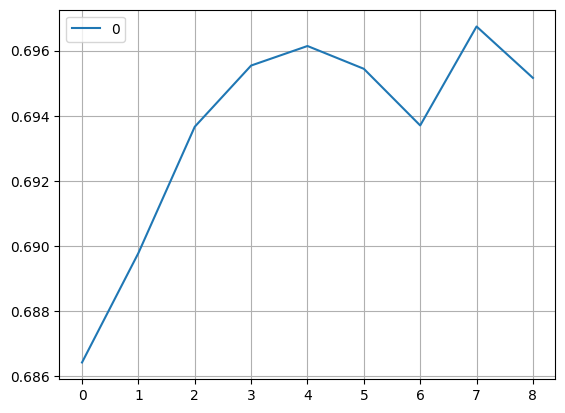

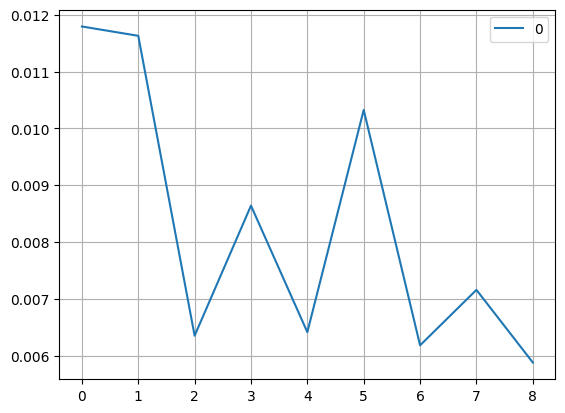

In [21]:
%matplotlib inline

pd.DataFrame([df.aggregate('mean')['mcc'] for df in prefix_stats]).plot(grid=True)

pd.DataFrame([df.aggregate('std')['mcc'] for df in prefix_stats]).plot(grid=True)


In [67]:
df = prefix_stats[0]

In [71]:
df.rename(columns={'mcc': 'mcc_20'})

,fold,sensitivity,specificity,accuracy,precision,mcc_20,micro_auroc
0,0,0.6380,0.9882,0.9700,0.7463,0.6745,0.9010
1,1,0.6411,0.9884,0.9704,0.7514,0.6788,0.9151


In [72]:
df

,fold,sensitivity,specificity,accuracy,precision,mcc,micro_auroc
0,0,0.6380,0.9882,0.9700,0.7463,0.6745,0.9010
1,1,0.6411,0.9884,0.9704,0.7514,0.6788,0.9151
